In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xesmf as xe

In [4]:
ds = xr.tutorial.open_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

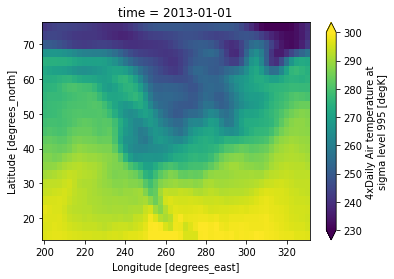

In [7]:
dr = ds['air']  # get a DataArray
ax = plt.axes()
dr.isel(time=0).plot.pcolormesh(ax=ax, vmin=230, vmax=300);


In [8]:
# Input Grid
ds['lat'].values, ds['lon'].values

(array([75. , 72.5, 70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. ,
        47.5, 45. , 42.5, 40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5,
        20. , 17.5, 15. ], dtype=float32),
 array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. ,
        222.5, 225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5,
        245. , 247.5, 250. , 252.5, 255. , 257.5, 260. , 262.5, 265. ,
        267.5, 270. , 272.5, 275. , 277.5, 280. , 282.5, 285. , 287.5,
        290. , 292.5, 295. , 297.5, 300. , 302.5, 305. , 307.5, 310. ,
        312.5, 315. , 317.5, 320. , 322.5, 325. , 327.5, 330. ],
       dtype=float32))

In [9]:
# Output Grid
ds_out = xr.Dataset({'lat': (['lat'], np.arange(16, 75, 1.0)),
                     'lon': (['lon'], np.arange(200, 330, 1.5)),
                    }
                   )
ds_out

<xarray.Dataset>
Dimensions:  (lat: 59, lon: 87)
Coordinates:
  * lat      (lat) float64 16.0 17.0 18.0 19.0 20.0 ... 70.0 71.0 72.0 73.0 74.0
  * lon      (lon) float64 200.0 201.5 203.0 204.5 ... 324.5 326.0 327.5 329.0
Data variables:
    *empty*

In [10]:
regridder = xe.Regridder(ds, ds_out, 'bilinear')
regridder  # print basic regridder information.

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_25x53_59x87.nc 
Reuse pre-computed weights? False 
Input grid shape:           (25, 53) 
Output grid shape:          (59, 87) 
Periodic in longitude?      False